# Inception Models

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import layers as tkl
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
classes = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

In [3]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
X_train[0].shape

(28, 28)

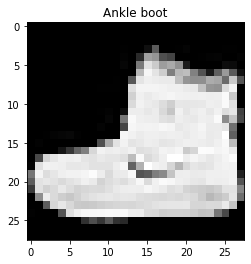

In [6]:
plt.imshow(X_train[0], cmap = "Greys_r")
plt.title(classes[y_train[0]])
plt.show()

### 1. Inception Network v1

In [7]:
def inception_module(X, x1, x3_reduce, x3, x5_reduce, x5, pool_proj, name = None, initializer = "he_normal"):
    conv2d_1x1 = tkl.Conv2D(x1, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(X)
    
    conv2d_3x3_reduce = tkl.Conv2D(x3_reduce, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(X)
    conv2d_3x3 = tkl.Conv2D(x3, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(conv2d_3x3_reduce)
    
    conv2d_5x5_reduce = tkl.Conv2D(x5_reduce, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(X)
    conv2d_5x5 = tkl.Conv2D(x5, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(conv2d_5x5_reduce)
    
    maxpool2d = tkl.MaxPool2D(pool_size = (3, 3), strides = (1, 1), padding = "same")(X)
    pool_proj = tkl.Conv2D(pool_proj, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu", kernel_initializer = initializer, bias_initializer = initializer)(maxpool2d)
    
    output = tkl.Concatenate(axis = 3, name = name)([conv2d_1x1, conv2d_3x3, conv2d_5x5, pool_proj])
    return output

In [8]:
def inception_v1(initializer = "he_normal"):
    input_layer = keras.Input(shape = (28, 28, 1), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (7, 7), strides = (2, 2), padding = "same", activation = "relu", name = "conv_1", kernel_initializer = initializer, bias_initializer = initializer)(input_layer)
    P1 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_1")(A1)
        
    I1 = inception_module(P1, 64, 96, 128, 16, 32, 32, "inception_3a", initializer = initializer)
    I2 = inception_module(I1, 128, 128, 192, 32, 96, 64, "inception_3b", initializer = initializer)
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(I2)
    
    D1 = tkl.Dropout(0.4)(P5)
    F1 = tkl.Flatten()(D1)
    L1 = tkl.Dense(1000, activation = "relu", name = "linear_1", kernel_initializer = initializer, bias_initializer = initializer)(F1)
    output = tkl.Dense(10, activation = "softmax", name = "output", kernel_initializer = initializer, bias_initializer = initializer)(L1)
    
    model = keras.Model(input_layer, output, name = "InceptionV1")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [9]:
inception_model_v1 = inception_v1()

Metal device set to: Apple M1 Pro


2022-10-21 20:07:14.285924: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-21 20:07:14.286224: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [10]:
history = inception_model_v1.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 25)

Epoch 1/25


2022-10-21 20:07:15.100527: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-21 20:07:15.605359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1874/1875 [============================>.] - ETA: 0s - loss: 0.5963 - accuracy: 0.7764

2022-10-21 20:07:51.342775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 39s 18ms/step - loss: 0.5961 - accuracy: 0.7765 - val_loss: 0.4330 - val_accuracy: 0.8416
Epoch 2/25
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3642 - accuracy: 0.8662 - val_loss: 0.3309 - val_accuracy: 0.8792
Epoch 3/25
1875/1875 [==============================] - 31s 16ms/step - loss: 0.3094 - accuracy: 0.8870 - val_loss: 0.3121 - val_accuracy: 0.8893
Epoch 4/25
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2765 - accuracy: 0.8970 - val_loss: 0.2908 - val_accuracy: 0.8948
Epoch 5/25
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2539 - accuracy: 0.9065 - val_loss: 0.2847 - val_accuracy: 0.8985
Epoch 6/25
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2356 - accuracy: 0.9117 - val_loss: 0.2815 - val_accuracy: 0.8983
Epoch 7/25
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2167 - accuracy: 0.9195 - val_loss: 0.2794 - val_accura

In [11]:
pred = inception_model_v1.predict(X_test)

  8/313 [..............................] - ETA: 3s  

2022-10-21 20:20:47.223413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step


In [12]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(pred, axis = 1), 10)

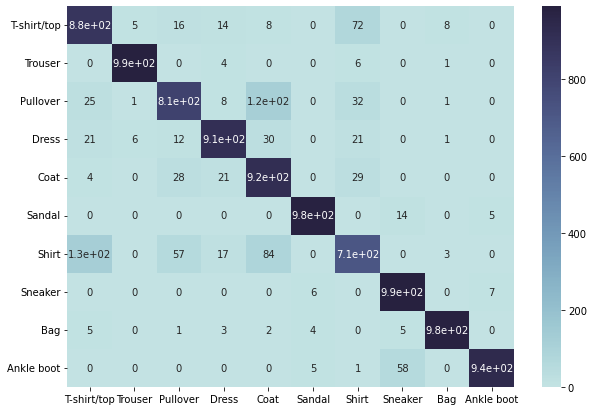

In [13]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### 2. Inception Network v2 - Transfer Learning

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

reshaped_X_train = list()
reshaped_X_test = list()

for image in range(len(X_train)):
    im = Image.fromarray(X_train[image])
    im = im.resize((96, 96))
    im = im.convert("RGB")
    reshaped_X_train.append(np.array(im))
    print("{}/{}".format(image + 1, len(X_train)), end = "\r")
reshaped_X_train = np.array(reshaped_X_train)
print("\033[92m'TRAIN' dataset reshaped.")

for image in range(len(X_test)):
    im = Image.fromarray(X_test[image])
    im = im.resize((96, 96))
    im = im.convert("RGB")
    reshaped_X_test.append(np.array(im))
    print("{}/{}".format(image + 1, len(X_test)), end = "\r")
reshaped_X_test = np.array(reshaped_X_test)
print("\033[92m'TEST' dataset reshaped.")

'TRAIN' dataset reshaped.


'TEST' dataset reshaped.


In [8]:
base_model = keras.applications.inception_v3.InceptionV3(include_top = False, input_shape = (96, 96, 3))

In [9]:
v2_A1 = tkl.Conv2D(512, kernel_size = (1, 1), strides = (1, 1), padding = "same", activation = "relu")(base_model.output)
v2_D1 = tkl.Dense(512, activation = "relu", name = "dense_1")(v2_A1)
v2_output = tkl.Dense(10, activation = "softmax", name = "output")(v2_D1)

In [10]:
inception_model_v2 = keras.Model(base_model.input, v2_output, name = "InceptionV2")

In [11]:
inception_model_v2.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "rmsprop",
    metrics = ["accuracy"]
)

In [12]:
inception_model_v2.fit(reshaped_X_train, y_train, validation_data = (reshaped_X_test, y_test), epochs = 3)

Epoch 1/3


2022-10-21 20:23:11.427093: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-21 20:23:15.948698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.3824 - accuracy: 0.1218

2022-10-21 20:28:42.929018: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 344s 170ms/step - loss: 0.3824 - accuracy: 0.1218 - val_loss: 0.1746 - val_accuracy: 0.1221
Epoch 2/3
1875/1875 [==============================] - 307s 164ms/step - loss: 0.1575 - accuracy: 0.1262 - val_loss: 0.1364 - val_accuracy: 0.1227
Epoch 3/3
1875/1875 [==============================] - 335s 178ms/step - loss: 0.1318 - accuracy: 0.1272 - val_loss: 0.0716 - val_accuracy: 0.1229


In [13]:
predictions = inception_model_v2.predict(reshaped_X_test)

2022-10-21 20:39:38.461652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 11s 31ms/step


In [14]:
np.count_nonzero(np.argmax(predictions, axis = 3).flatten() == y_test) / len(y_test)

0.9866

In [15]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 3).flatten(), 10)

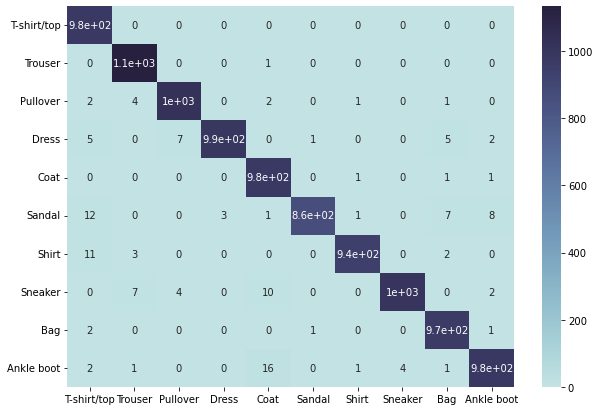

In [16]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### Inception Network v3  - Random

In [23]:
random = np.random.randint(10, size = 10000)

In [24]:
print("Random Accuracy =", np.count_nonzero(random == y_test) / 10000)

Random Accuracy = 0.1029


In [25]:
confusion_matrix = tf.math.confusion_matrix(y_test, random, 10)

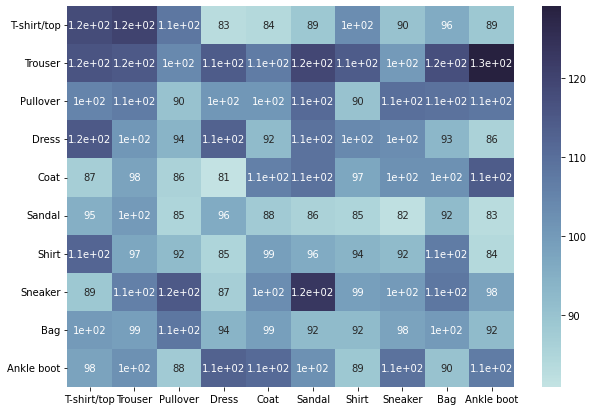

In [26]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### Inception Network v4 - 4

In [7]:
def inception_v4(initializer = "he_normal"):
    input_layer = keras.Input(shape = (28, 28, 1), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (7, 7), strides = (2, 2), padding = "same", activation = "relu", name = "conv_1", kernel_initializer = initializer, bias_initializer = initializer)(input_layer)
    P1 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_1")(A1)
        
    I1 = inception_module(P1, 64, 96, 128, 16, 32, 32, "inception_3a", initializer = initializer)
    I2 = inception_module(I1, 128, 128, 192, 32, 96, 64, "inception_3b", initializer = initializer)
    
    P2 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_2")(I2)
    
    I3 = inception_module(P2, 192, 96, 208, 16, 48, 64, "inception_4a", initializer = initializer)
    I4 = inception_module(I3, 160, 112, 224, 24, 64, 64, "inception_4b", initializer = initializer)
    
    P3 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_3")(I4)
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(P3)
    
    D1 = tkl.Dropout(0.4)(P5)
    F1 = tkl.Flatten()(D1)
    L1 = tkl.Dense(512, activation = "relu", name = "linear_1", kernel_initializer = initializer, bias_initializer = initializer)(F1)
    output = tkl.Dense(10, activation = "softmax", name = "output", kernel_initializer = initializer, bias_initializer = initializer)(L1)
    
    model = keras.Model(input_layer, output, name = "InceptionV1")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [9]:
inception_model_v4 = inception_v4()

In [10]:
history_v4 = inception_model_v4.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)

Epoch 1/50


2022-10-21 23:14:44.414225: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-21 23:14:45.123717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1873/1875 [============================>.] - ETA: 0s - loss: 0.5451 - accuracy: 0.7973

2022-10-21 23:15:28.402363: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 47s 24ms/step - loss: 0.5447 - accuracy: 0.7974 - val_loss: 0.3750 - val_accuracy: 0.8627
Epoch 2/50
1875/1875 [==============================] - 43s 23ms/step - loss: 0.3380 - accuracy: 0.8778 - val_loss: 0.3424 - val_accuracy: 0.8757
Epoch 3/50
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2909 - accuracy: 0.8931 - val_loss: 0.3180 - val_accuracy: 0.8862
Epoch 4/50
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2674 - accuracy: 0.9024 - val_loss: 0.3133 - val_accuracy: 0.8904
Epoch 5/50
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2465 - accuracy: 0.9109 - val_loss: 0.2907 - val_accuracy: 0.8967
Epoch 6/50
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2311 - accuracy: 0.9151 - val_loss: 0.3111 - val_accuracy: 0.8852
Epoch 7/50
1875/1875 [==============================] - 44s 24ms/step - loss: 0.2156 - accuracy: 0.9212 - val_loss: 0.2759 - val_accura

In [11]:
predictions = inception_model_v4.predict(X_test)

2022-10-21 23:59:23.749038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 3s 9ms/step


In [12]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 10)

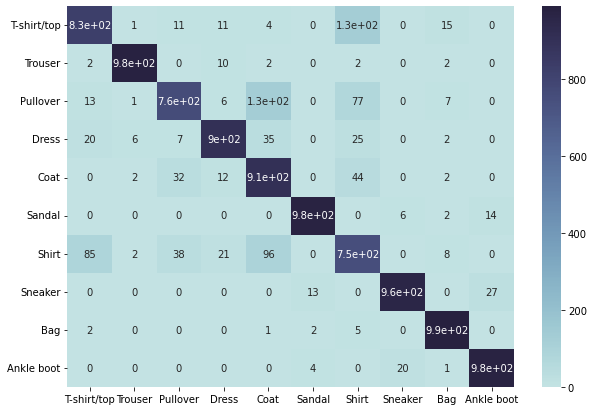

In [13]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### Inception v5 - 6

In [7]:
def inception_v5(initializer = "he_normal"):
    input_layer = keras.Input(shape = (28, 28, 1), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (7, 7), strides = (2, 2), padding = "same", activation = "relu", name = "conv_1", kernel_initializer = initializer, bias_initializer = initializer)(input_layer)
    P1 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_1")(A1)
        
    I1 = inception_module(P1, 64, 96, 128, 16, 32, 32, "inception_3a", initializer = initializer)
    I2 = inception_module(I1, 128, 128, 192, 32, 96, 64, "inception_3b", initializer = initializer)
    
    P2 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_2")(I2)
    
    I3 = inception_module(P2, 192, 96, 208, 16, 48, 64, "inception_4a", initializer = initializer)
    I4 = inception_module(I3, 160, 112, 224, 24, 64, 64, "inception_4b", initializer = initializer)
    
    P3 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_3")(I4)
    
    I5 = inception_module(P3, 128, 128, 256, 24, 64, 64, "inception_4c", initializer = initializer)
    I6 = inception_module(I5, 112, 144, 288, 32, 64, 64, "inception_4d", initializer = initializer)
    
    P4 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_4")(I6)
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(P4)
    
    D1 = tkl.Dropout(0.4)(P5)
    F1 = tkl.Flatten()(D1)
    L1 = tkl.Dense(512, activation = "relu", name = "linear_1", kernel_initializer = initializer, bias_initializer = initializer)(F1)
    output = tkl.Dense(10, activation = "softmax", name = "output", kernel_initializer = initializer, bias_initializer = initializer)(L1)
    
    model = keras.Model(input_layer, output, name = "InceptionV1")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [8]:
inception_model_v5 = inception_v5()

Metal device set to: Apple M1 Pro


2022-10-22 00:12:04.140040: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-22 00:12:04.140248: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
history_v5 = inception_model_v5.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)

Epoch 1/50


2022-10-22 00:12:05.014997: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-22 00:12:06.430072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.5924 - accuracy: 0.7803

2022-10-22 00:13:18.801406: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 79s 40ms/step - loss: 0.5924 - accuracy: 0.7803 - val_loss: 0.4492 - val_accuracy: 0.8373
Epoch 2/50
1875/1875 [==============================] - 69s 37ms/step - loss: 0.3647 - accuracy: 0.8676 - val_loss: 0.3841 - val_accuracy: 0.8363
Epoch 3/50
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3181 - accuracy: 0.8856 - val_loss: 0.3162 - val_accuracy: 0.8860
Epoch 4/50
1875/1875 [==============================] - 78s 42ms/step - loss: 0.2923 - accuracy: 0.8946 - val_loss: 0.3516 - val_accuracy: 0.8685
Epoch 5/50
1875/1875 [==============================] - 71s 38ms/step - loss: 0.2726 - accuracy: 0.9032 - val_loss: 0.3115 - val_accuracy: 0.8896
Epoch 6/50
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2583 - accuracy: 0.9067 - val_loss: 0.3333 - val_accuracy: 0.8838
Epoch 7/50
1875/1875 [==============================] - 79s 42ms/step - loss: 0.2453 - accuracy: 0.9116 - val_loss: 0.3114 - val_accura

In [10]:
predictions = inception_model_v5.predict(X_test)

2022-10-22 01:09:36.196324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 4s 10ms/step


In [11]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 10)

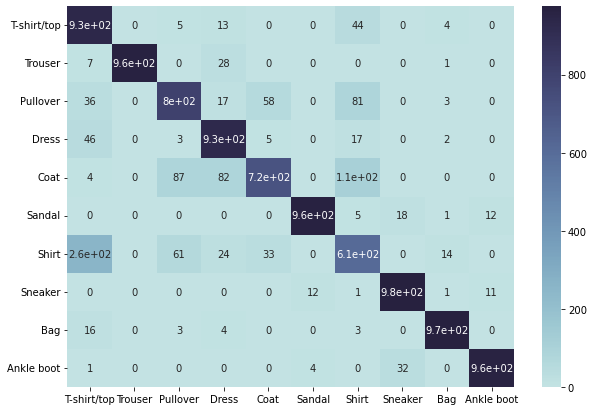

In [12]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()

### Inception v6 - 9

In [8]:
def inception_v6(initializer = "he_normal"):
    input_layer = keras.Input(shape = (28, 28, 1), name = "input_1")
    
    A1 = tkl.Conv2D(64, kernel_size = (7, 7), strides = (2, 2), padding = "same", activation = "relu", name = "conv_1", kernel_initializer = initializer, bias_initializer = initializer)(input_layer)
    P1 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_1")(A1)
        
    I1 = inception_module(P1, 64, 96, 128, 16, 32, 32, "inception_3a", initializer = initializer)
    I2 = inception_module(I1, 128, 128, 192, 32, 96, 64, "inception_3b", initializer = initializer)
    
    P2 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_2")(I2)
    
    I3 = inception_module(P2, 192, 96, 208, 16, 48, 64, "inception_4a", initializer = initializer)
    I4 = inception_module(I3, 160, 112, 224, 24, 64, 64, "inception_4b", initializer = initializer)
    I5 = inception_module(I4, 128, 128, 256, 24, 64, 64, "inception_4c", initializer = initializer)
    I6 = inception_module(I5, 112, 144, 288, 32, 64, 64, "inception_4d", initializer = initializer)
    I7 = inception_module(I6, 256, 160, 320, 32, 128, 128, "inception_4e", initializer = initializer)
    
    P4 = tkl.MaxPool2D(pool_size = (3, 3), strides = (2, 2), padding = "same", name = "pool_3")(I7)
    
    I8 = inception_module(P4, 256, 160, 320, 32, 128, 128, "inception_5a", initializer = initializer)
    I9 = inception_module(I8, 384, 192, 384, 48, 128, 128, "inception_5b", initializer = initializer)
    
    P5 = tkl.GlobalAveragePooling2D(name = "pool_5")(I9)
    
    D1 = tkl.Dropout(0.4)(P5)
    F1 = tkl.Flatten()(D1)
    L1 = tkl.Dense(512, activation = "relu", name = "linear_1", kernel_initializer = initializer, bias_initializer = initializer)(F1)
    output = tkl.Dense(10, activation = "softmax", name = "output", kernel_initializer = initializer, bias_initializer = initializer)(L1)
    
    model = keras.Model(input_layer, output, name = "InceptionV1")
    model.compile(
        loss = keras.losses.SparseCategoricalCrossentropy(),
        optimizer = keras.optimizers.Adam(),
        metrics = ["accuracy"]
    )
    return model

In [9]:
inception_model_v6 = inception_v6()

2022-10-22 01:13:38.695417: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-22 01:13:38.695533: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1 Pro


In [10]:
history_v6 = inception_model_v6.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 50)

Epoch 1/50


2022-10-22 01:13:39.581814: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-22 01:13:40.845764: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.6795 - accuracy: 0.7461

2022-10-22 01:15:07.202405: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 93s 48ms/step - loss: 0.6795 - accuracy: 0.7461 - val_loss: 0.4453 - val_accuracy: 0.8353
Epoch 2/50
1875/1875 [==============================] - 84s 45ms/step - loss: 0.4091 - accuracy: 0.8533 - val_loss: 0.3973 - val_accuracy: 0.8578
Epoch 3/50
1875/1875 [==============================] - 82s 43ms/step - loss: 0.3487 - accuracy: 0.8754 - val_loss: 0.3764 - val_accuracy: 0.8648
Epoch 4/50
1875/1875 [==============================] - 82s 44ms/step - loss: 0.3164 - accuracy: 0.8862 - val_loss: 0.3866 - val_accuracy: 0.8632
Epoch 5/50
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2959 - accuracy: 0.8954 - val_loss: 0.3774 - val_accuracy: 0.8705
Epoch 6/50
1875/1875 [==============================] - 81s 43ms/step - loss: 0.2788 - accuracy: 0.9015 - val_loss: 0.3094 - val_accuracy: 0.8870
Epoch 7/50
1875/1875 [==============================] - 82s 44ms/step - loss: 0.2638 - accuracy: 0.9053 - val_loss: 0.3077 - val_accura

In [11]:
max(history_v6.history["val_accuracy"])

0.9112000465393066

In [12]:
predictions = inception_model_v6.predict(X_test)

2022-10-22 02:28:45.718467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 5s 13ms/step


In [13]:
confusion_matrix = tf.math.confusion_matrix(y_test, np.argmax(predictions, axis = 1), 10)

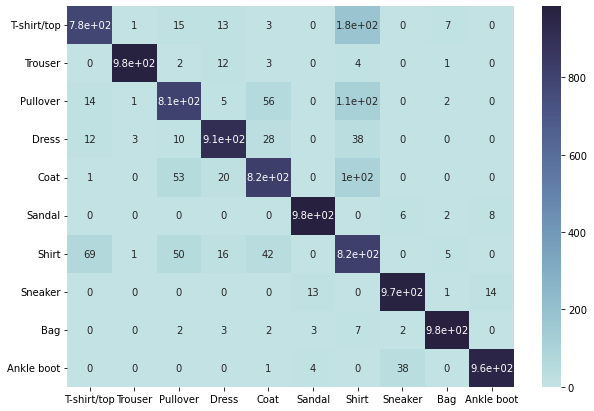

In [14]:
df_cm = pd.DataFrame(confusion_matrix, index = classes, columns = classes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=sn.color_palette("ch:start=.2,rot=-.3", as_cmap=True))
plt.show()